### This article is based on the analysis of the reviews and ratings user gives on Flipkart to make others aware of their experience and moreover about the quality of the product and brand. So, by analyzing that data we can tell the users a lot about the products and also the ways to enhance the quality of the product. 

### Here we will be using Machine Learning techniques to analyze that data and make it more efficient to understand and prediction ready.

# Our task is to predict whether the review given is positive or negative.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gaurav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data = pd.read_csv('flipkart_data.csv')
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9976 non-null   object
 1   rating  9976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.0+ KB


In [6]:
data.isnull().sum()

review    0
rating    0
dtype: int64

## The dataset has no missing data

In [7]:
data.describe()

,rating
count,9976.000000
mean,4.215417
std,1.167911
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [8]:
data['rating'].unique()

array([5, 4, 1, 3, 2])

In [11]:
data['rating'].value_counts()

rating
5    5726
4    2365
3     884
1     691
2     310
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='count'>

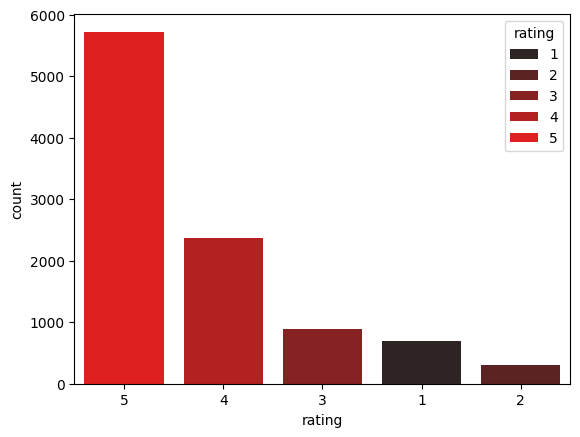

In [16]:
sns.countplot(data=data,
              x='rating',
              order=data.rating.value_counts().index, color= 'r', hue= data['rating'])

## Preprocessing and cleaning the reviews

In [17]:
# rating label(final)
pos_neg = []
for i in range(len(data['rating'])):
    if data['rating'][i] >= 5:
        pos_neg.append(1)
    else:
        pos_neg.append(0)

data['label'] = pos_neg

In [18]:
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm

# Ensure necessary resources are downloaded
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

def preprocess_text(text_data): 
    preprocessed_text = [] 

    for sentence in tqdm(text_data): 
        # Removing punctuations 
        sentence = re.sub(r'[^\w\s]', '', sentence) 

        # Converting to lowercase and removing stopwords
        preprocessed_text.append(' '.join(token.lower() 
                                          for token in nltk.word_tokenize(sentence) 
                                          if token.lower() not in stopwords.words('english'))) 

    return preprocessed_text

# Example usage (ensure 'data' contains a column 'review')
preprocessed_review = preprocess_text(data['review'].values)
data['review'] = preprocessed_review

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gaurav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Gaurav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gaurav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 9976/9976 [00:33<00:00, 301.06it/s]


In [19]:
data.head()

,review,rating,label
0,nice produt like design lot easy carry looked ...,5,1
1,awesome soundvery pretty see nd sound quality ...,5,1
2,awesome sound quality pros 78 hrs battery life...,4,0
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1


## Checking out that how many counts are there for positive and negative sentiments.

In [20]:
data["label"].value_counts()

label
1    5726
0    4250
Name: count, dtype: int64

### Wordcloud of all the words with label = 1 i.e. positive

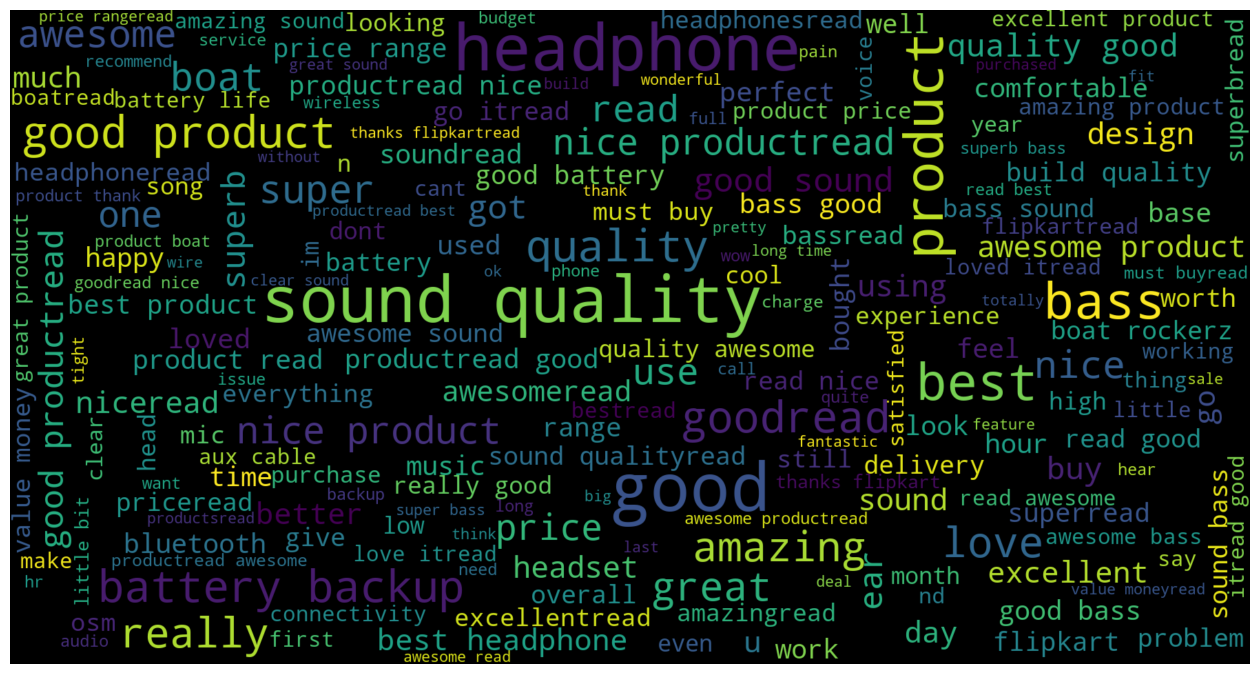

In [21]:
consolidated = ' '.join(
    word for word in data['review'][data['label'] == 1].astype(str))
wordCloud = WordCloud(width=1800, height=950,
                      random_state=45, max_font_size=97)
plt.figure(figsize=(16, 12))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['review'] ).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
y = data['label']
y  = y.to_frame()
y


,label
0,1
1,1
2,0
3,1
4,1
...,...
9971,1
9972,1
9973,1
9974,1


## Model training, Evaluation, and Prediction

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state = 30)

In [25]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=0) 
model.fit(X_train,y_train) 

#testing the model 
pred = model.predict(X_train) 
print(accuracy_score(y_train,pred))

0.9186046511627907


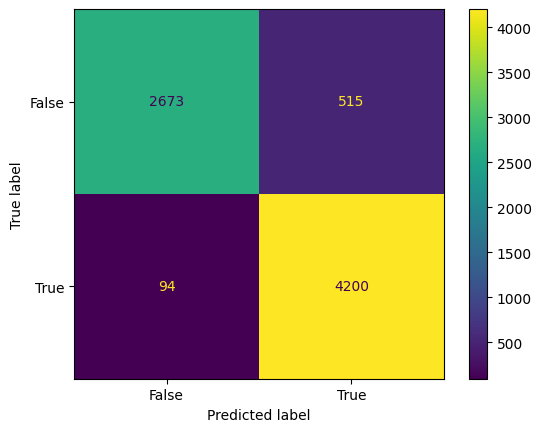

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3188
           1       0.89      0.98      0.93      4294

    accuracy                           0.92      7482
   macro avg       0.93      0.91      0.92      7482
weighted avg       0.92      0.92      0.92      7482



In [26]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_train,pred) 

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = [False, True]) 

cm_display.plot() 
plt.show()
print(classification_report(y_train, pred))